In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import scipy as sp
import scipy.optimize

In [3]:
files = os.listdir("GR6-8")

detection_1 = pd.read_csv("GR6-8/C2--C800001--00202.csv", skiprows=4, delimiter=",", index_col=False)
# detection_1.drop(['Unnamed: 2'], axis=1, inplace=True)

a. Repeat the process for all 200 detections:
    1. Read one detection file, x (time) & y (voltage amplitude)
    2. Find the maximum value of the y (voltage) and its corresponding value of x (time)
    3. calculate 90% and 10% of the max volage value and their corresponding values of x (time), on both sides (rise & decay)
    4. calculate ∆t on both sides (rise and decay) from 10% value to 90% value and from 90% value to 10% value

b. take the average of all ∆t values from 200 detections to calculate 𝜏 in V_max * exp (-t/𝜏)

In [4]:
def exp_decay(t, V0, tau, C):
    return V0 * np.exp(-t / tau) + C

def exp_rise(t, V0, tau, C):
    return V0 * (1 - np.exp(-t / tau)) + C

In [5]:
max_idx = detection_1['Ampl'].idxmax()
max_volt = detection_1['Ampl'].max()

time_decay = detection_1['Time'][max_idx:]
voltage_decay = detection_1['Ampl'][max_idx:]

time_rise = detection_1['Time'][0:max_idx+1]
voltage_rise = detection_1['Ampl'][0:max_idx+1]

max_10 = max_volt * 0.1
max_90 = max_volt * 0.9

In [6]:
max_volt, max_90, max_10

(np.float64(1.01338), np.float64(0.912042), np.float64(0.101338))

In [7]:
initial_guess = [1.15, 0, 2.0]
decay_parms, decay_cov = sp.optimize.curve_fit(exp_decay, time_decay, voltage_decay, p0=initial_guess)

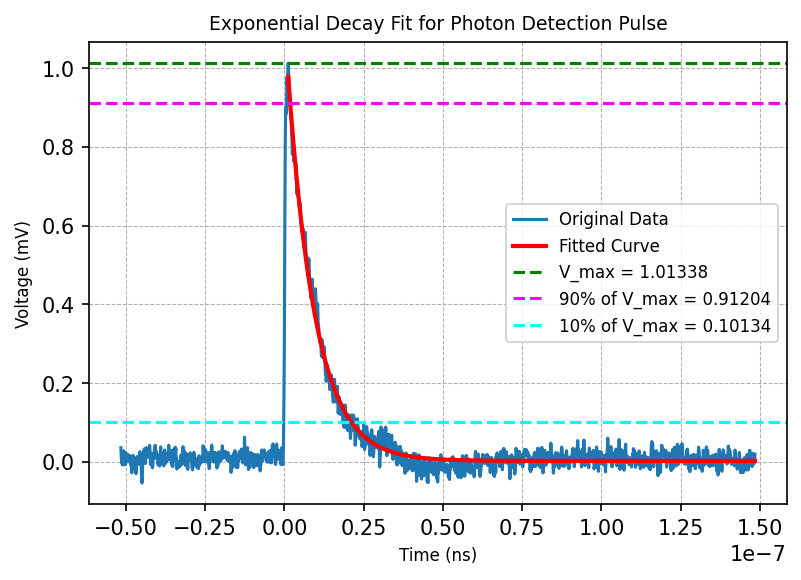

In [8]:
plt.figure(dpi=150, figsize=(6, 4))
plt.plot(detection_1['Time'], detection_1['Ampl'], label='Original Data')
plt.plot(time_decay, exp_decay(time_decay, *decay_parms), 'r-', label='Fitted Curve', linewidth=2)
plt.axhline(y=max_volt, color='green', linestyle='--', label=f'V_max = {max_volt}')
plt.axhline(y=max_90, color='magenta', linestyle='--', label=f'90% of V_max = {max_90:.5f}')
plt.axhline(y=max_10, color='cyan', linestyle='--', label=f'10% of V_max = {max_10:.5f}')
plt.xlabel('Time (ns)', fontsize=8)
plt.ylabel('Voltage (mV)', fontsize=8)
plt.title('Exponential Decay Fit for Photon Detection Pulse', fontsize=9)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='best', fontsize=8)
plt.savefig("photon-detection-8.png")
plt.show()

In [9]:
decay_parms

array([1.12032227e+00, 8.68692758e-09, 2.47410517e-03])

In [27]:
initial_guess = [0, 0, 0]
rise_parms, rise_cov = sp.optimize.curve_fit(exp_rise, time_rise, voltage_rise)

/var/folders/n2/30p6hmss7cn12_xf4gjxdk740000gn/T/ipykernel_7362/2756994392.py:2: OptimizeWarning: Covariance of the parameters could not be estimated
  rise_parms, rise_cov = sp.optimize.curve_fit(exp_rise, time_rise, voltage_rise)


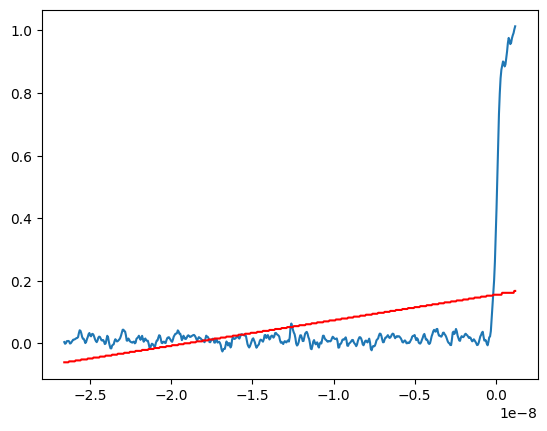

In [28]:
plt.plot(time_rise, voltage_rise)
plt.plot(time_rise, exp_rise(time_rise, *rise_parms), 'r-', label='non linear curvefit')

plt.show()

Fitted Parameters: V0 = -497.746187906464, tau = -7597625.307718899, C = 497.8063961966417


/var/folders/n2/30p6hmss7cn12_xf4gjxdk740000gn/T/ipykernel_8428/1424456320.py:21: OptimizeWarning: Covariance of the parameters could not be estimated
  params, covariance = curve_fit(exp_rise, time, voltage, p0=initial_guess)


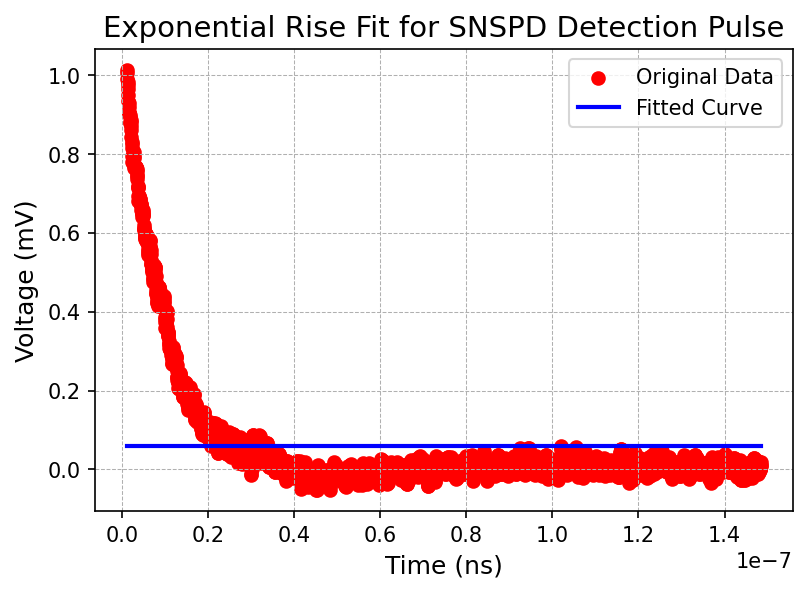

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Sample SNSPD detection voltage pulse data (replace with your data)
# Time (t) in nanoseconds, Voltage (V) in millivolts
time = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])  # Example time values (ns)
voltage = np.array([0.1, 1.2, 2.5, 3.4, 4.1, 4.7, 4.9, 5.0, 5.0, 5.0, 5.0])  # Example voltage values (mV)

voltage = voltage_decay
time = time_decay

# Define exponential rise function
def exp_rise(t, V0, tau, C):
    return V0 * np.exp(-t/ tau) + C

# Initial guess for parameters: V0 (final amplitude), tau (time constant), C (offset)
initial_guess = [1.0, 2.0, 0.0]

# Curve fitting
params, covariance = curve_fit(exp_rise, time, voltage, p0=initial_guess)

# Extract fitted parameters
V0_fit, tau_fit, C_fit = params
print(f"Fitted Parameters: V0 = {V0_fit}, tau = {tau_fit}, C = {C_fit}")

# Generate fitted curve for plotting
time_fit = np.linspace(min(time), max(time), 500)  # Fine time points for smooth curve
voltage_fit = exp_rise(time_fit, V0_fit, tau_fit, C_fit)

# Plot original data and fitted curve
plt.figure(dpi=150, figsize=(6, 4))
plt.scatter(time, voltage, color='red', label='Original Data')  # Original data points
plt.plot(time_fit, voltage_fit, color='blue', label='Fitted Curve', linewidth=2)  # Fitted curve

# Adding labels, title, and legend
plt.xlabel('Time (ns)', fontsize=12)
plt.ylabel('Voltage (mV)', fontsize=12)
plt.title('Exponential Rise Fit for SNSPD Detection Pulse', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='best')
plt.show()
